In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cap-4611-2021-fall-assignment-02/sample_submission.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/eval.csv
/kaggle/input/cap-4611-2021-fall-assignment-02/train.csv


**LOADING DATA AND EXAMINING SHAPE**

In [2]:
train_df = pd.read_csv("/kaggle/input/cap-4611-2021-fall-assignment-02/train.csv")
test_df = pd.read_csv("/kaggle/input/cap-4611-2021-fall-assignment-02/eval.csv")

train_df.head()


,id,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,474,Road to Ballhalla,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,475,RollerCoaster Legends II: Thor's Hammer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,476,Island Time,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
3,477,Bridge Constructor Portal,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
4,478,Secret of Mana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET


**CHECKING FOR MISSING VALUES**

In [3]:

for column in test_df: check_nan = test_df[column].isnull().values.any()
print(column, check_nan)
print(train_df.isnull().sum())

violence False
id                          0
title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol 

**CONDUCTING EPA TO EXAMINE THE DATA AND DETERMINE OUTLIERS**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


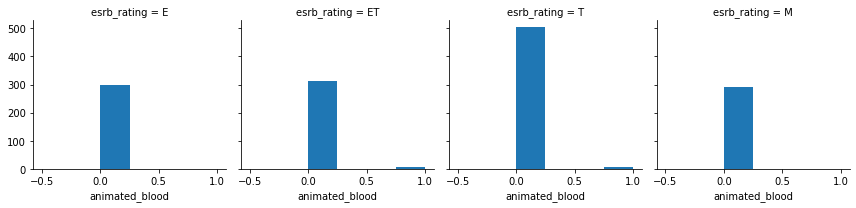

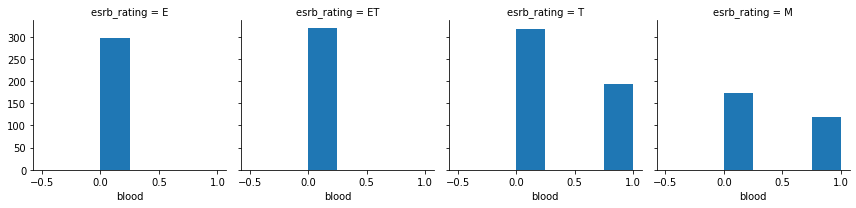

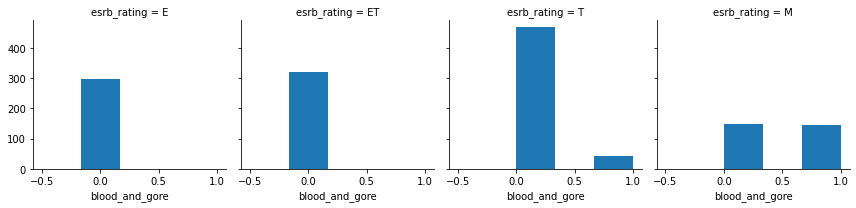

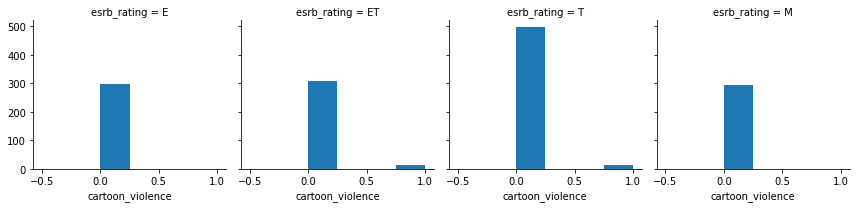

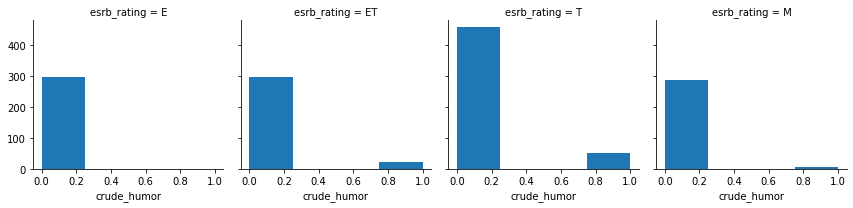

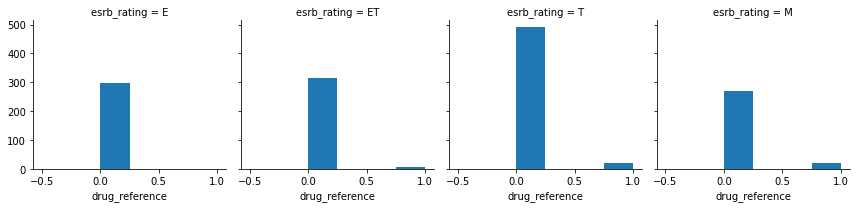

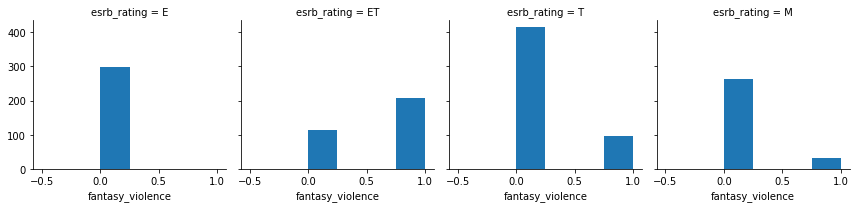

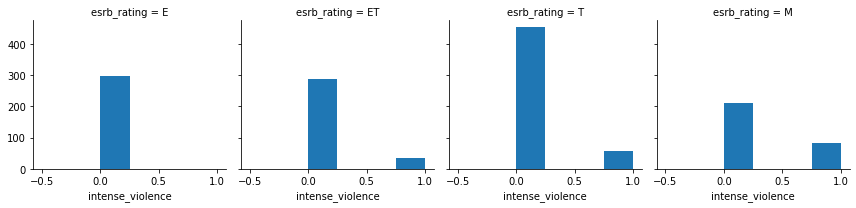

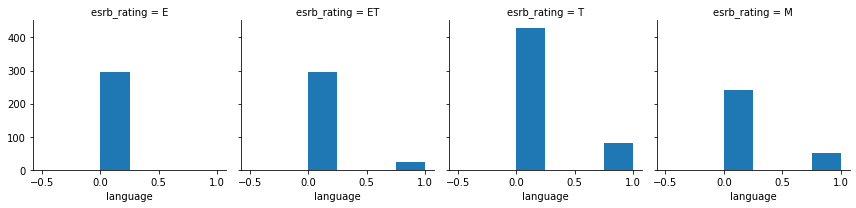

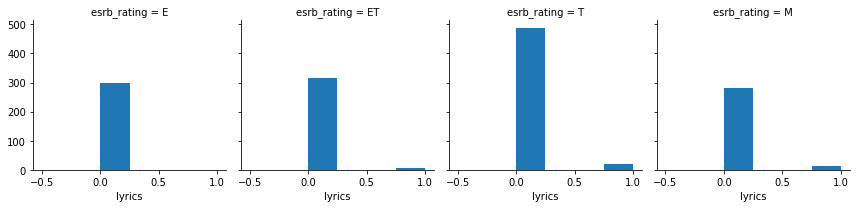

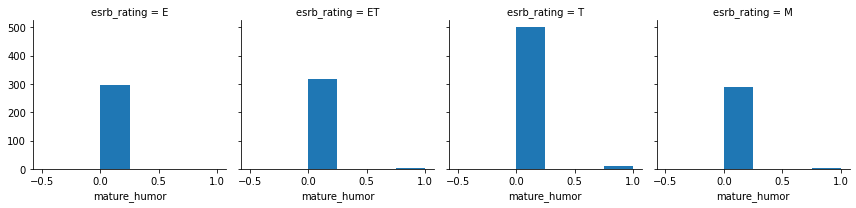

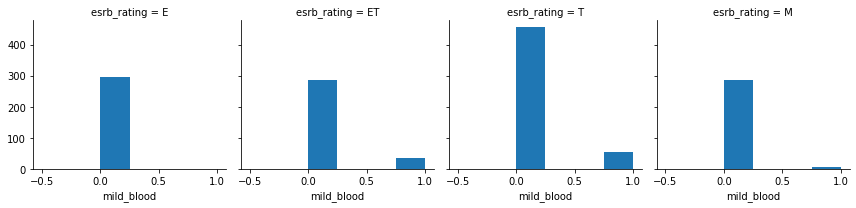

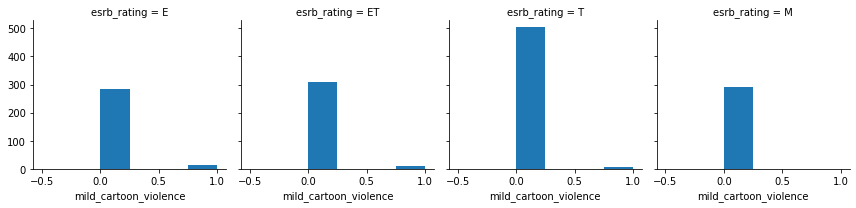

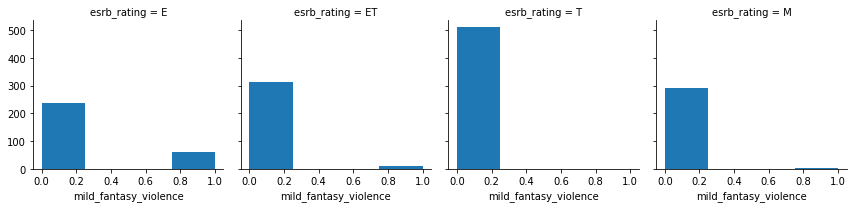

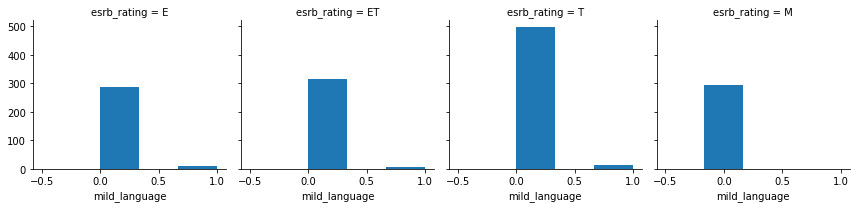

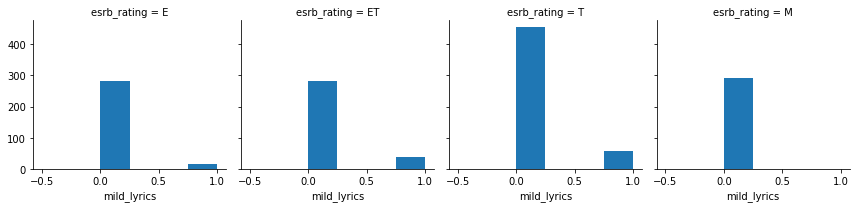

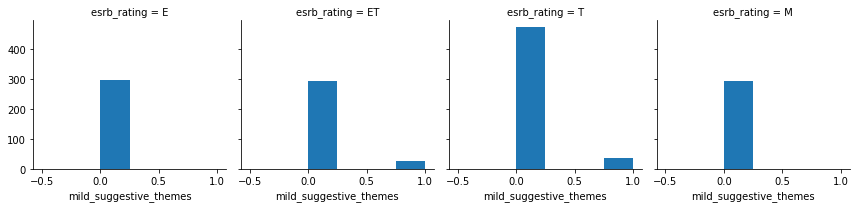

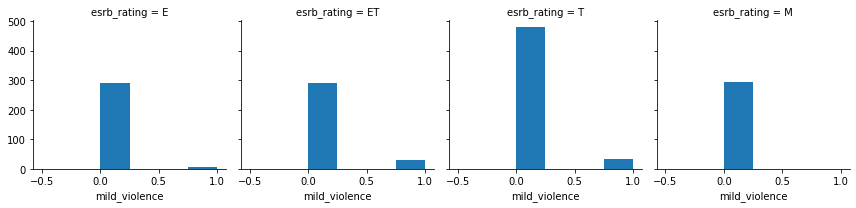

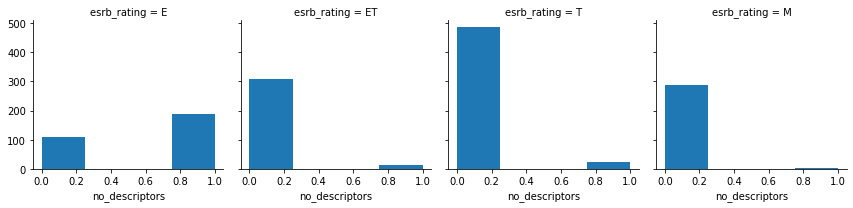

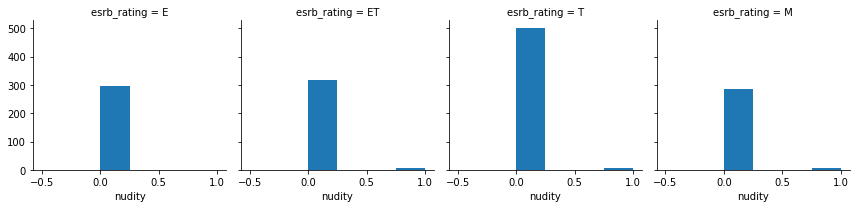

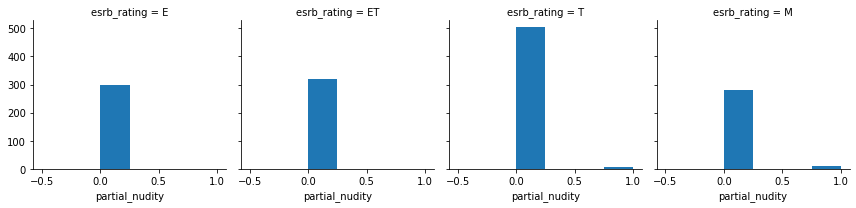

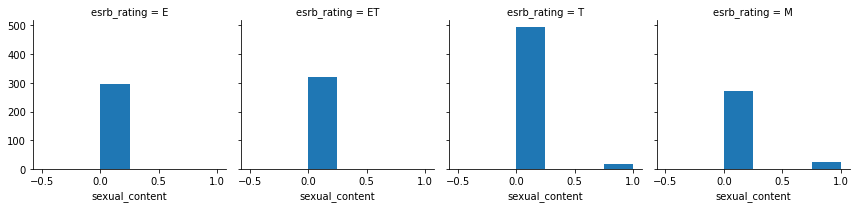

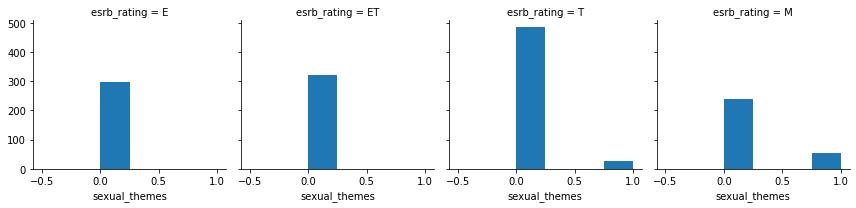

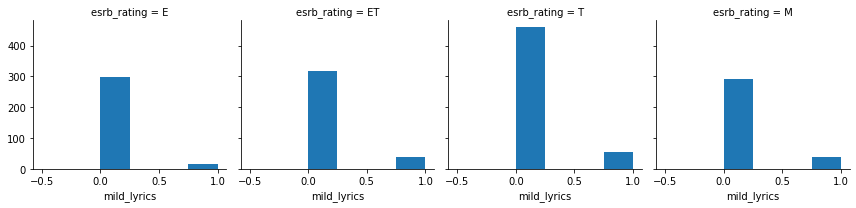

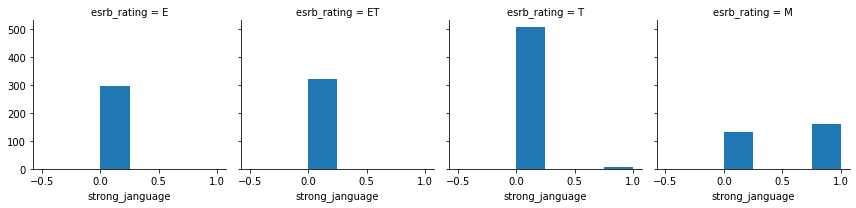

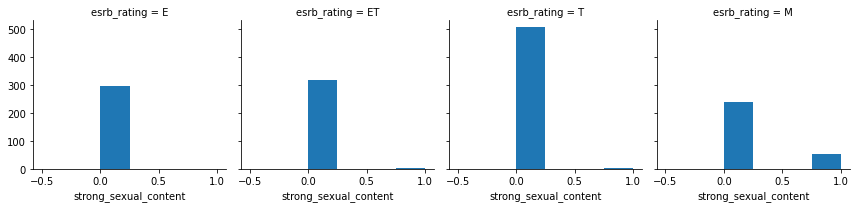

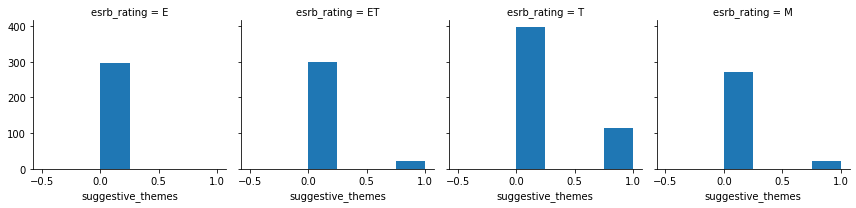

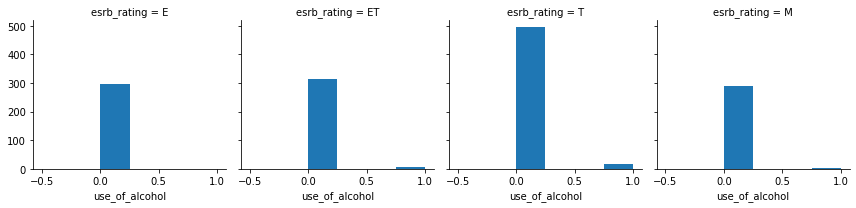

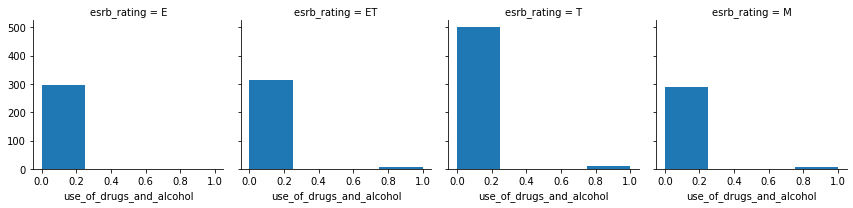

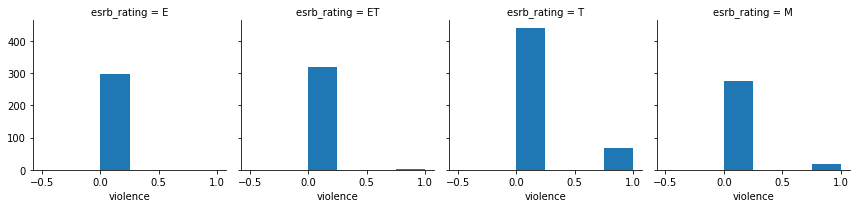

In [4]:
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "animated_blood", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "blood", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "blood_and_gore", bins=3)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "cartoon_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "crude_humor", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "drug_reference", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "fantasy_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "intense_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "language", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "lyrics", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mature_humor", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_blood", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_cartoon_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_fantasy_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_language", bins=3)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_lyrics", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_suggestive_themes", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "mild_violence", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "no_descriptors", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "nudity", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "partial_nudity", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "sexual_content", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "sexual_themes", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "simulated_gambling", bins=4)
pclass_hist.map(plt.hist, "mild_lyrics", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "strong_janguage", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "strong_sexual_content", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "suggestive_themes", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "use_of_alcohol", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "use_of_drugs_and_alcohol", bins=4)
pclass_hist = sns.FacetGrid(train_df, col='esrb_rating')
pclass_hist.map(plt.hist, "violence", bins=4)

Here we are able to determine which categories are most relevant in determining a games esrb rating

**DECISION TREE MODEL**

In [5]:
from sklearn.tree import DecisionTreeClassifier
y = train_df["esrb_rating"]
features = [
"animated_blood",              
"blood",                       
"blood_and_gore",              
"cartoon_violence",            
"crude_humor",                 
"drug_reference",              
"fantasy_violence",            
"intense_violence",            
"language",                    
"lyrics",                      
"mature_humor",                
"mild_blood",                 
"mild_cartoon_violence",       
"mild_fantasy_violence",       
"mild_language",               
"mild_lyrics",                 
"mild_suggestive_themes",      
"mild_violence",               
"no_descriptors",             
"nudity",                      
"partial_nudity",             
"sexual_content",            
"sexual_themes",            
"simulated_gambling",         
"strong_janguage",             
"strong_sexual_content",       
"suggestive_themes",         
"use_of_alcohol",             
"use_of_drugs_and_alcohol",    
"violence"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, y)  
dt_pred = decision_tree.predict(X_test)  
decision_tree_score = (decision_tree.score(X, y))
print("Decision Tree Model Score: " + str(decision_tree_score))

Decision Tree Model Score: 0.9148486980999296


In [6]:
print(X.describe())

       animated_blood        blood  blood_and_gore  cartoon_violence  \
count     1421.000000  1421.000000     1421.000000       1421.000000   
mean         0.009852     0.219564        0.132301          0.019001   
std          0.098803     0.414097        0.338937          0.136575   
min          0.000000     0.000000        0.000000          0.000000   
25%          0.000000     0.000000        0.000000          0.000000   
50%          0.000000     0.000000        0.000000          0.000000   
75%          0.000000     0.000000        0.000000          0.000000   
max          1.000000     1.000000        1.000000          1.000000   

       crude_humor  drug_reference  fantasy_violence  intense_violence  \
count  1421.000000     1421.000000       1421.000000       1421.000000   
mean      0.056298        0.034483          0.235749          0.123856   
std       0.230578        0.182530          0.424616          0.329534   
min       0.000000        0.000000          0.000000   

**RANDOM FOREST MODEL**

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_df["esrb_rating"]

features = [
"animated_blood",              
"blood",                       
"blood_and_gore",              
"cartoon_violence",            
"crude_humor",                 
"drug_reference",              
"fantasy_violence",            
"intense_violence",            
"language",                    
"lyrics",                      
"mature_humor",                
"mild_blood",                 
"mild_cartoon_violence",       
"mild_fantasy_violence",       
"mild_language",               
"mild_lyrics",                 
"mild_suggestive_themes",      
"mild_violence",               
"no_descriptors",             
"nudity",                      
"partial_nudity",             
"sexual_content",            
"sexual_themes",            
"simulated_gambling",         
"strong_janguage",             
"strong_sexual_content",       
"suggestive_themes",         
"use_of_alcohol",             
"use_of_drugs_and_alcohol",    
"violence"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'id': test_df.id, 'esrb_rating': predictions})
#output.to_csv('submission.csv', index=False)
print("Random forest score : " + str(decision_tree_score))

Random forest score : 0.9148486980999296


In [8]:
print(X.describe())

       animated_blood        blood  blood_and_gore  cartoon_violence  \
count     1421.000000  1421.000000     1421.000000       1421.000000   
mean         0.009852     0.219564        0.132301          0.019001   
std          0.098803     0.414097        0.338937          0.136575   
min          0.000000     0.000000        0.000000          0.000000   
25%          0.000000     0.000000        0.000000          0.000000   
50%          0.000000     0.000000        0.000000          0.000000   
75%          0.000000     0.000000        0.000000          0.000000   
max          1.000000     1.000000        1.000000          1.000000   

       crude_humor  drug_reference  fantasy_violence  intense_violence  \
count  1421.000000     1421.000000       1421.000000       1421.000000   
mean      0.056298        0.034483          0.235749          0.123856   
std       0.230578        0.182530          0.424616          0.329534   
min       0.000000        0.000000          0.000000   

**NEAREST NEIGHBORS MODEL**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn_model = knn.fit(X, y)  
knn_pred = knn.predict(X_test)  
knn_score = knn.score(X, y)

print("Nearest Neighbors Model Score: " + str(knn_score))

Nearest Neighbors Model Score: 0.8740323715693173


In [10]:
print(X.describe())

       animated_blood        blood  blood_and_gore  cartoon_violence  \
count     1421.000000  1421.000000     1421.000000       1421.000000   
mean         0.009852     0.219564        0.132301          0.019001   
std          0.098803     0.414097        0.338937          0.136575   
min          0.000000     0.000000        0.000000          0.000000   
25%          0.000000     0.000000        0.000000          0.000000   
50%          0.000000     0.000000        0.000000          0.000000   
75%          0.000000     0.000000        0.000000          0.000000   
max          1.000000     1.000000        1.000000          1.000000   

       crude_humor  drug_reference  fantasy_violence  intense_violence  \
count  1421.000000     1421.000000       1421.000000       1421.000000   
mean      0.056298        0.034483          0.235749          0.123856   
std       0.230578        0.182530          0.424616          0.329534   
min       0.000000        0.000000          0.000000   

Creating output from model with best score which was random forest with a score of .9148

In [11]:
predictions = decision_tree.predict(X_test)  
output = pd.DataFrame({'id': test_df.id, 'esrb_rating': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
